In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import time

# Import the formations dictionary
from lineupsDict import formations 

### Visualizing Tactical Formations from the Lineups Dictionary

In this step, we iterate through all predefined formations stored in `lineupsDict.py` and display each lineup on a football pitch using the `draw_pitch` function. Each formation is visualized in a separate figure to analyze player positioning and role distribution.

In [5]:
def draw_pitch(ax=None, field_color='green'):
    """
    Draw a 120 x 80 pitch on the given Axes.
    (0,0) is top-left, (120,80) is bottom-right.
    """
    if ax is None:
        ax = plt.subplots(figsize=(12.0, 8.0))
    
    # Set pitch background
    if field_color == 'green':
        ax.set_facecolor('mediumseagreen')
        lc = 'whitesmoke'  # line color
        border_color = 'white'  # Border color to differentiate pitch edges
    else:
        lc = 'black'
        border_color = 'white'
    
    # Outer boundaries with distinct color
    ax.plot([0,0],[0,80], color=border_color, linewidth=3)
    ax.plot([120,120],[0,80], color=border_color, linewidth=3)
    ax.plot([0,120],[0,0], color=border_color, linewidth=3)
    ax.plot([0,120],[80,80], color=border_color, linewidth=3)
    
    # Center line
    ax.plot([60,60],[0,80], color=lc, linewidth=2)
    
    # Center circle
    center_circle = plt.Circle((60, 40), 10, color=lc, fill=False, linewidth=2)
    ax.add_patch(center_circle)
    
    # Penalty areas and arcs (both sides fixed)
    for x in [0, 120]:
        penalty_x = 18 if x == 0 else 120-18
        goal_x = 6 if x == 0 else 120-6
        penalty_spot = 11 if x == 0 else 109
        arc_center = (12, 40) if x == 0 else (108.2, 40)
        arc_angle = 0 if x == 0 else 180
        
        # Penalty area
        ax.plot([x, penalty_x], [18, 18], color=lc, linewidth=2)
        ax.plot([penalty_x, penalty_x], [18, 62], color=lc, linewidth=2)
        ax.plot([x, penalty_x], [62, 62], color=lc, linewidth=2)
        
        # Goal area
        ax.plot([x, goal_x], [30, 30], color=lc, linewidth=2)
        ax.plot([goal_x, goal_x], [30, 50], color=lc, linewidth=2)
        ax.plot([x, goal_x], [50, 50], color=lc, linewidth=2)
        
        # Penalty spots
        ax.plot([penalty_spot], [40], marker='o', markersize=5, color=lc)

        # Center spot
        ax.plot([60], [40], marker='o', markersize=5, color=lc)
        
        # Penalty arcs
        penalty_arc = Arc(
            arc_center, 20, 20, angle=arc_angle, 
            theta1=308, theta2=52, color=lc, linewidth=2
        )
        ax.add_patch(penalty_arc)
        
    # Corners
    corner_radius = 2

    ax.add_patch(plt.Circle((0, 0), corner_radius, color=lc, fill=False, linewidth=2))      # top-left
    ax.add_patch(plt.Circle((120, 0), corner_radius, color=lc, fill=False, linewidth=2))    # top-right
    ax.add_patch(plt.Circle((0, 80), corner_radius, color=lc, fill=False, linewidth=2))     # bottom-left
    ax.add_patch(plt.Circle((120, 80), corner_radius, color=lc, fill=False, linewidth=2))   # bottom-right

    
    # Flip y-axis so top=0
    ax.set_xlim(0,120)
    ax.set_ylim(80,0)
    
    # Remove ticks but maintain pitch edges visibility
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    return ax

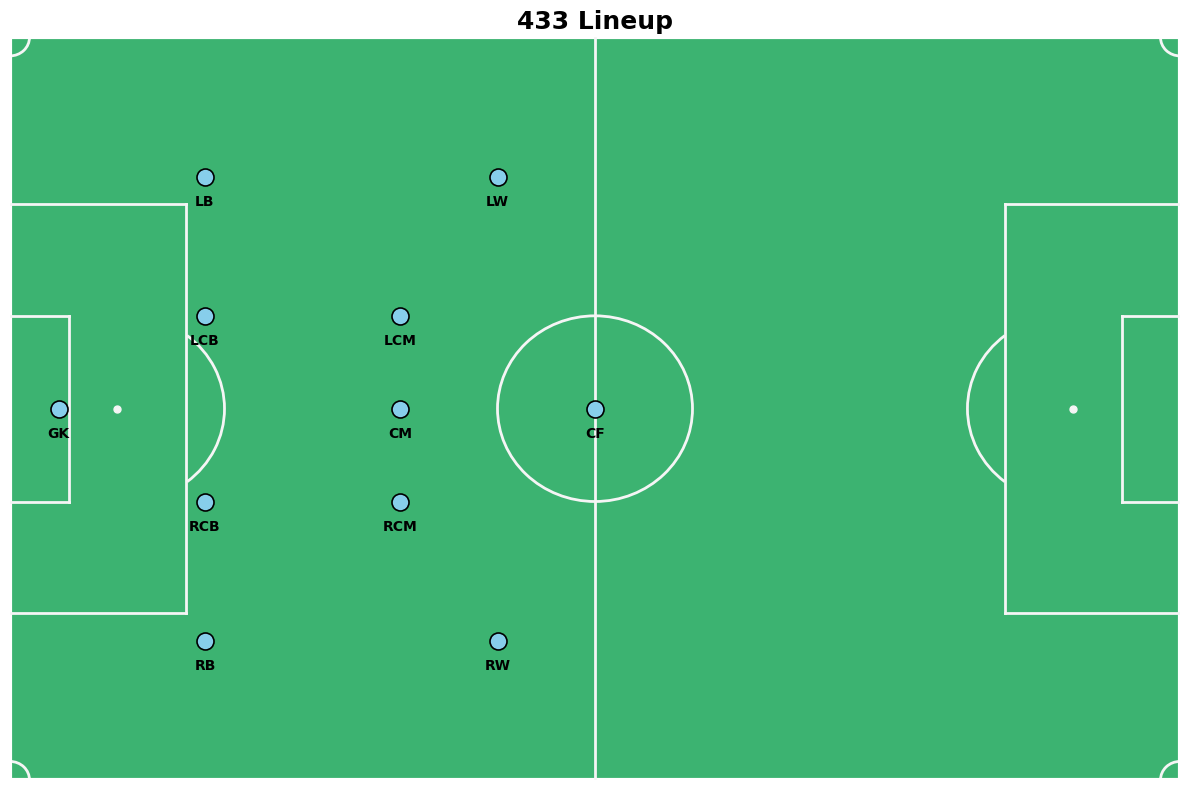

In [22]:
# Select a single formation code
formation_code = "433"  # Change this to any available formation key

# Retrieve the lineup
lineup = formations[formation_code]

# Draw pitch and formation
fig, ax = plt.subplots(figsize=(12, 8))
draw_pitch(ax)

for player in lineup:
    x, y = player["x"], player["y"]
    abbr = player["abbr"]
    ax.scatter(x, y, s=150, color="skyblue", edgecolor="black", linewidth=1.2, zorder=3)
    ax.text(x, y + 3.5, abbr, fontsize=10, ha="center", va="bottom", color="black", fontweight="bold")

plt.title(f"{formation_code} Lineup", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()

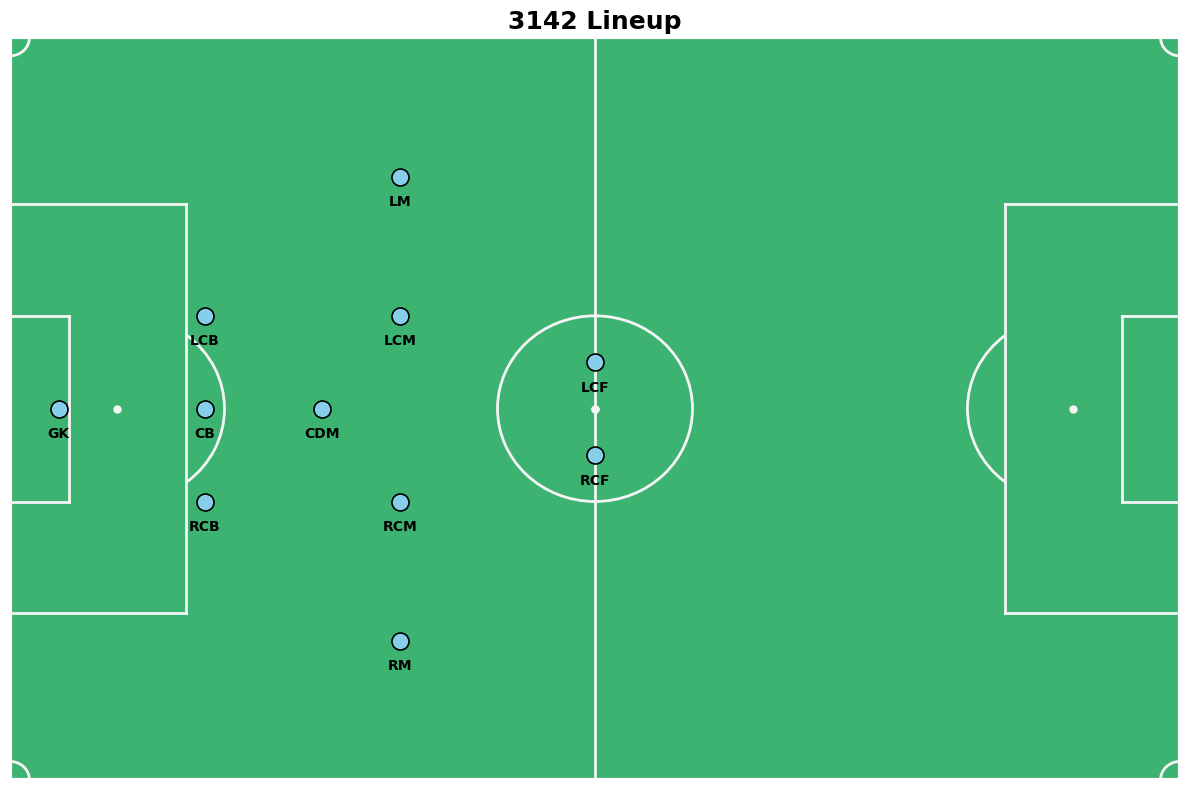

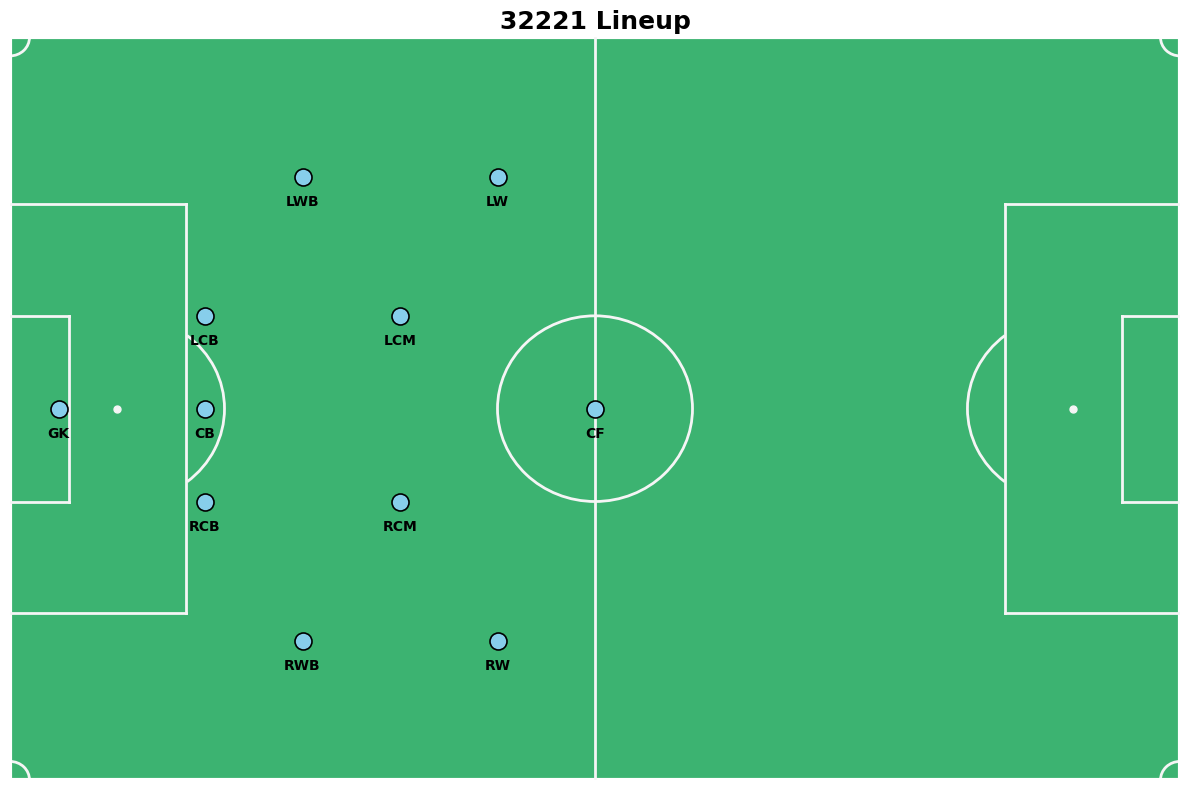

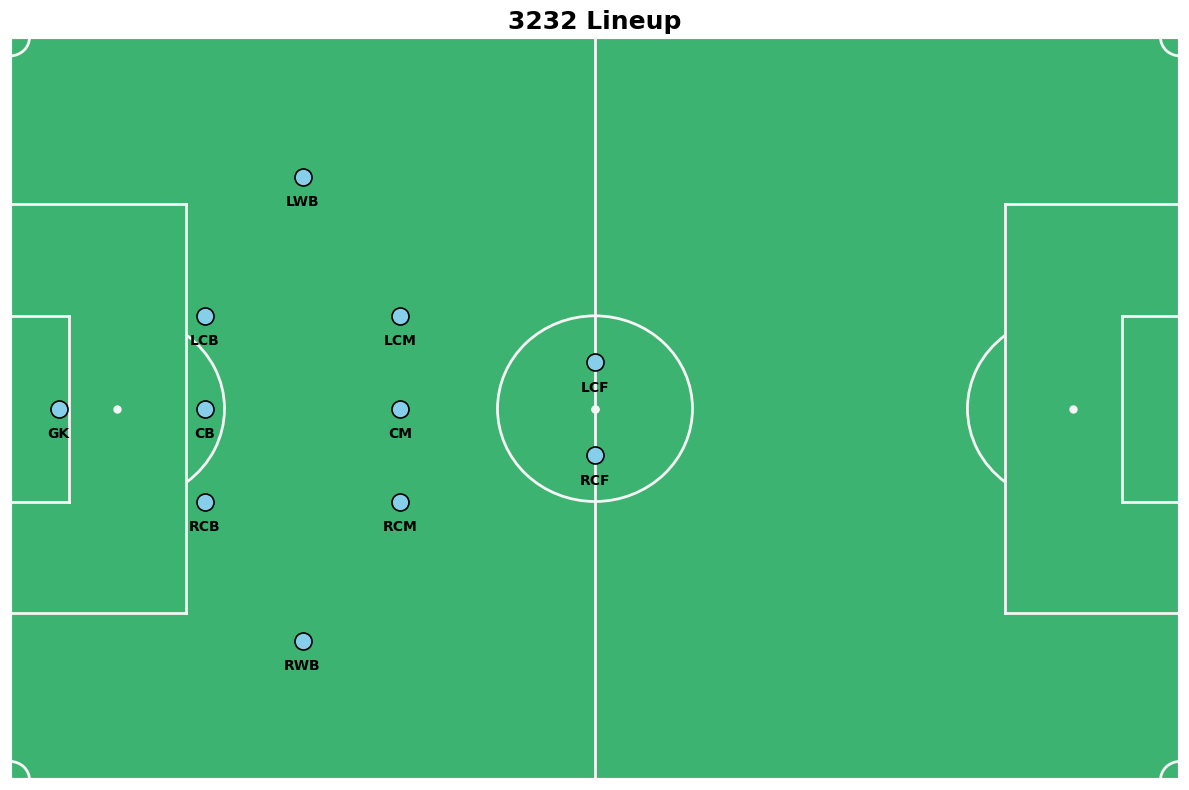

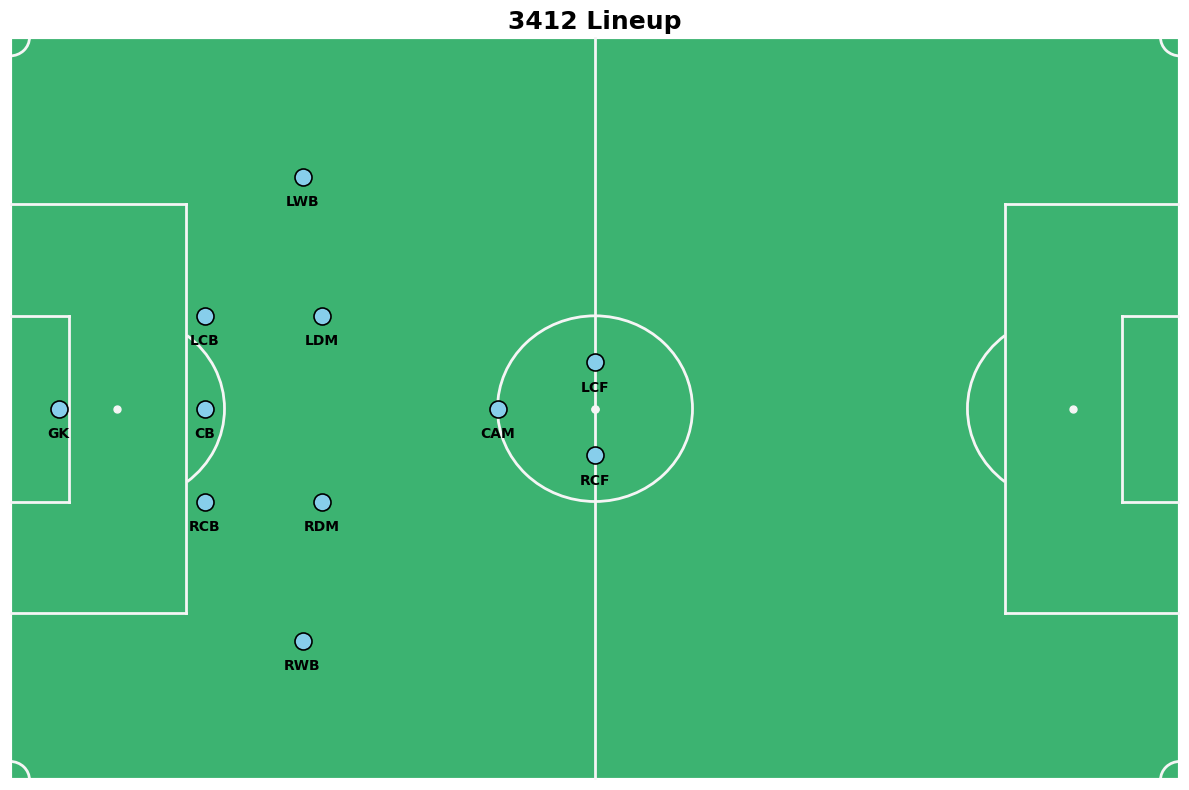

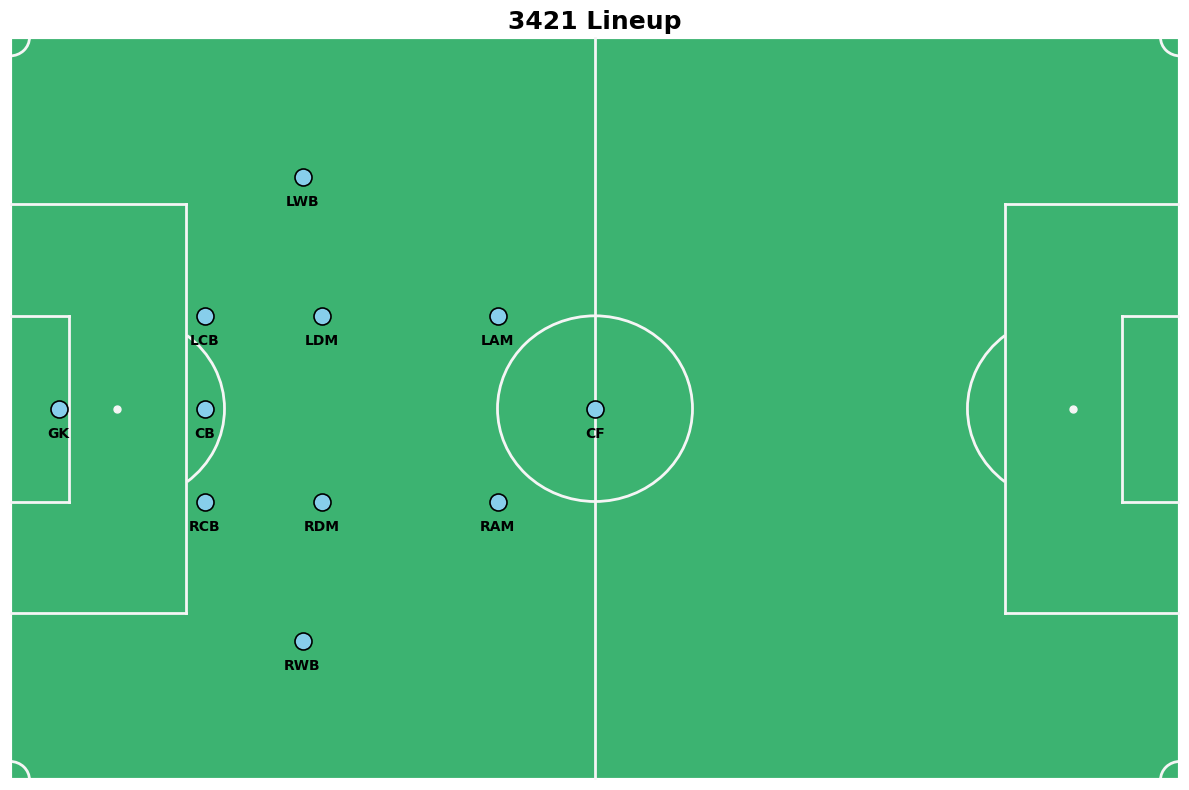

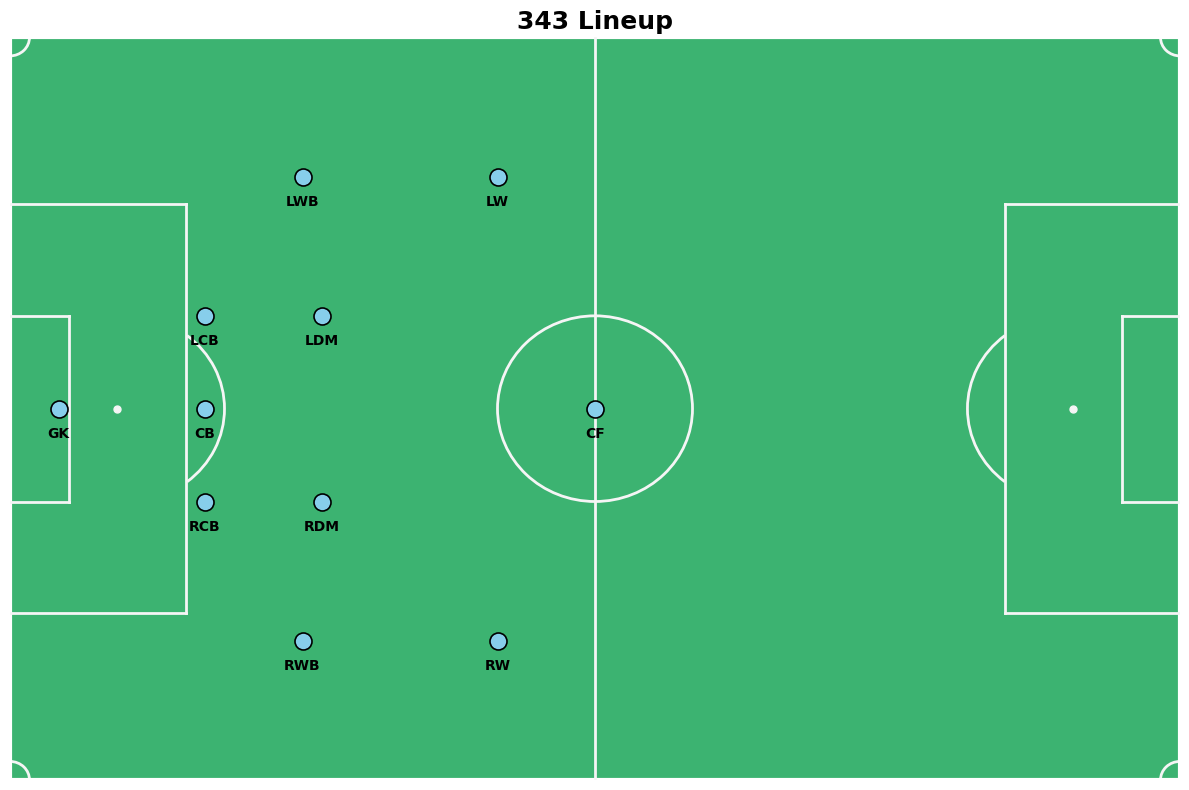

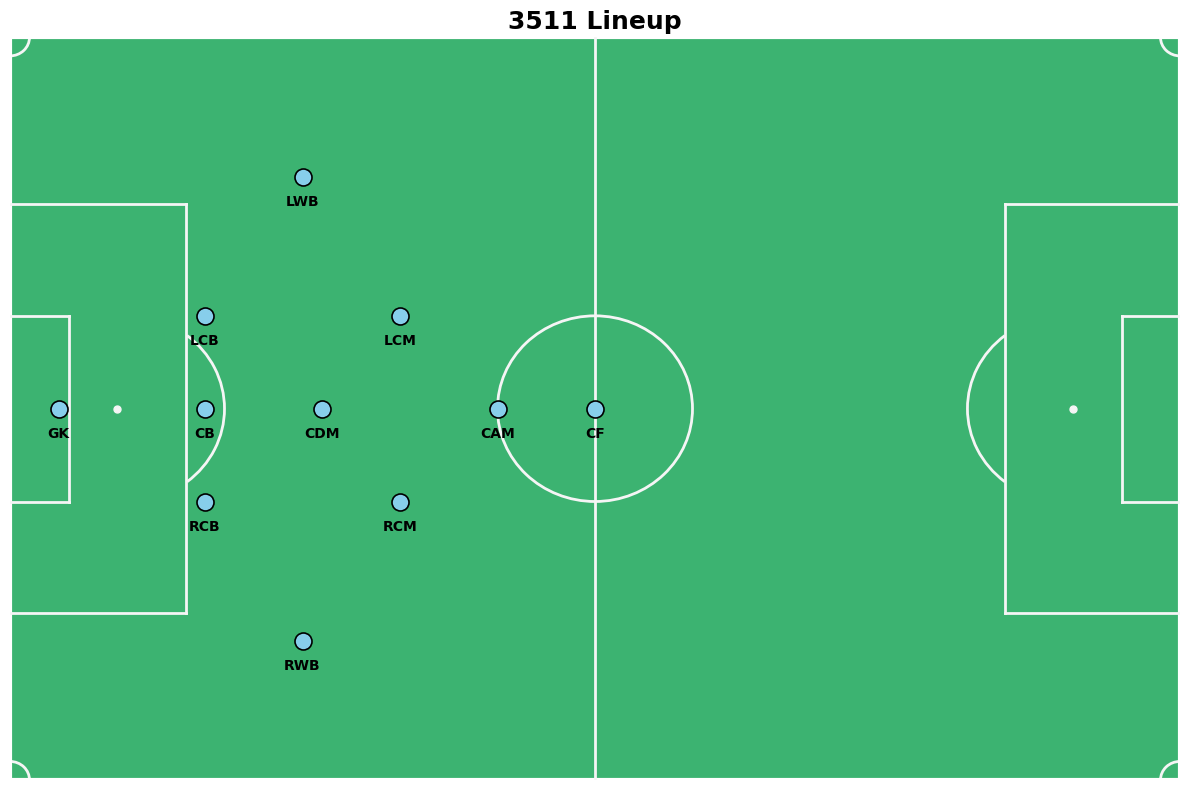

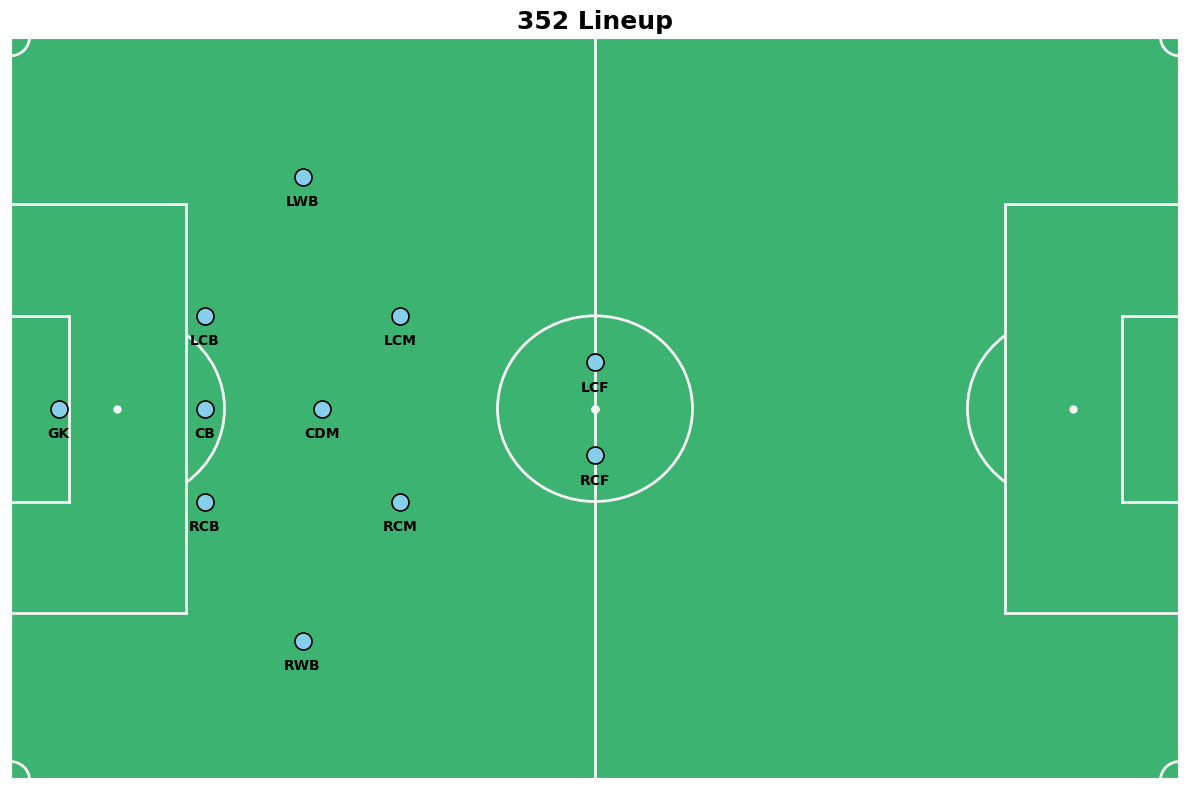

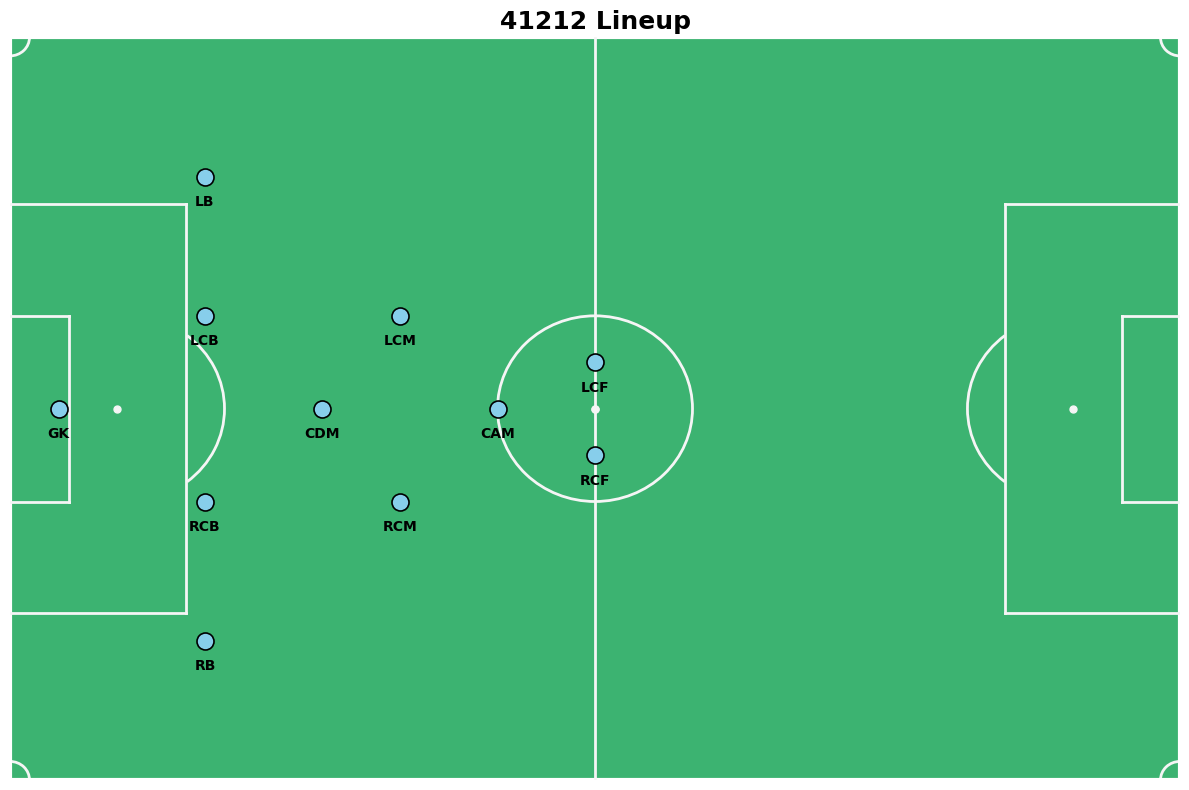

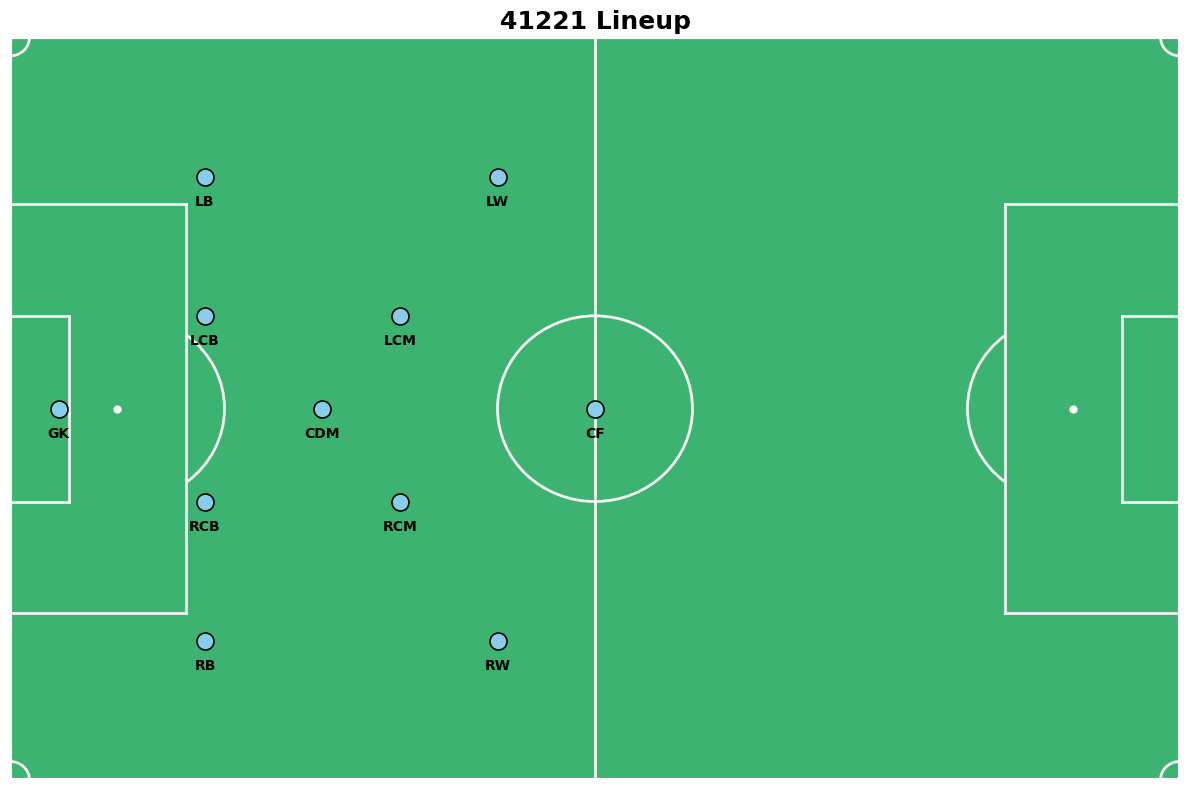

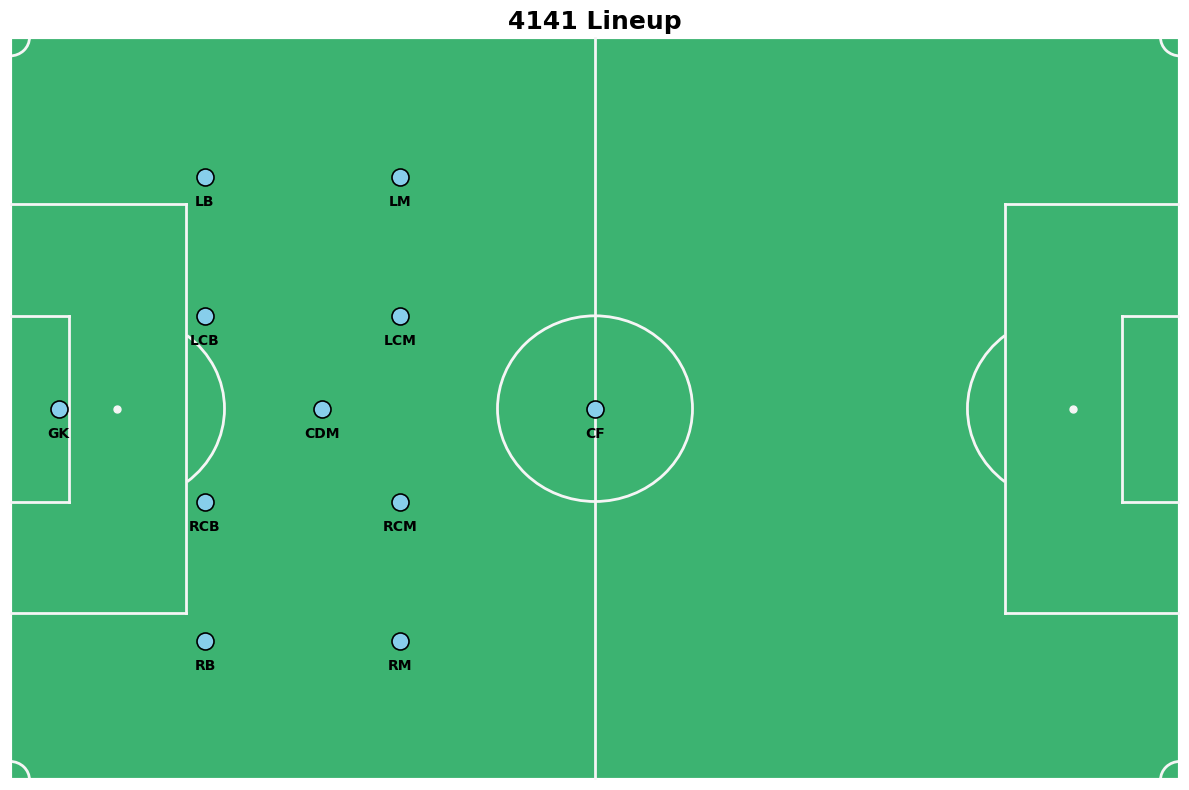

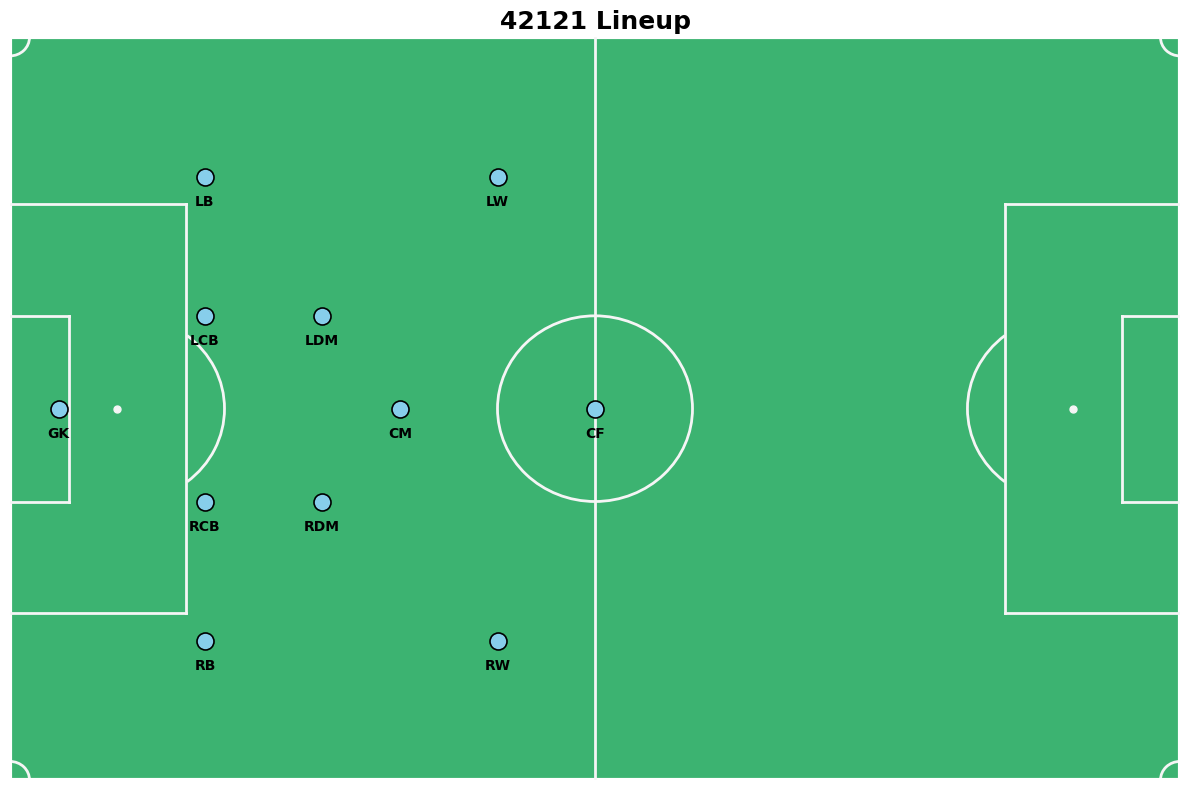

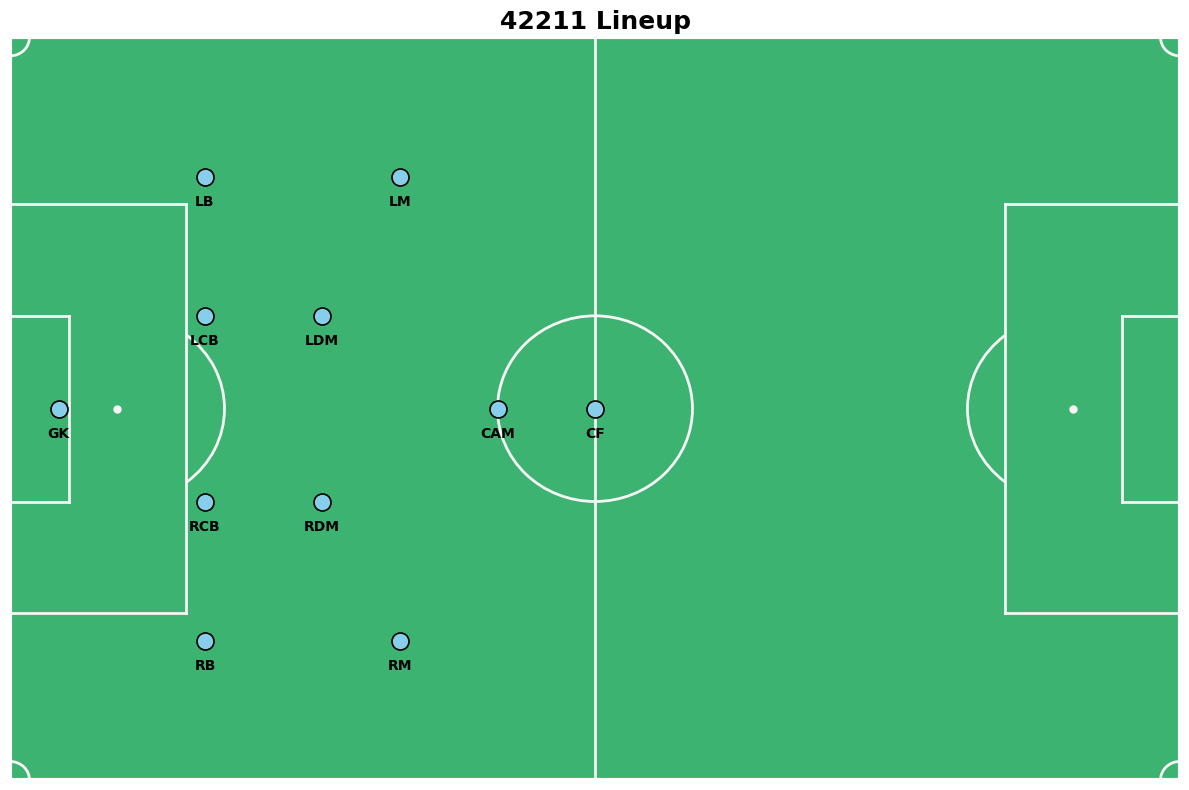

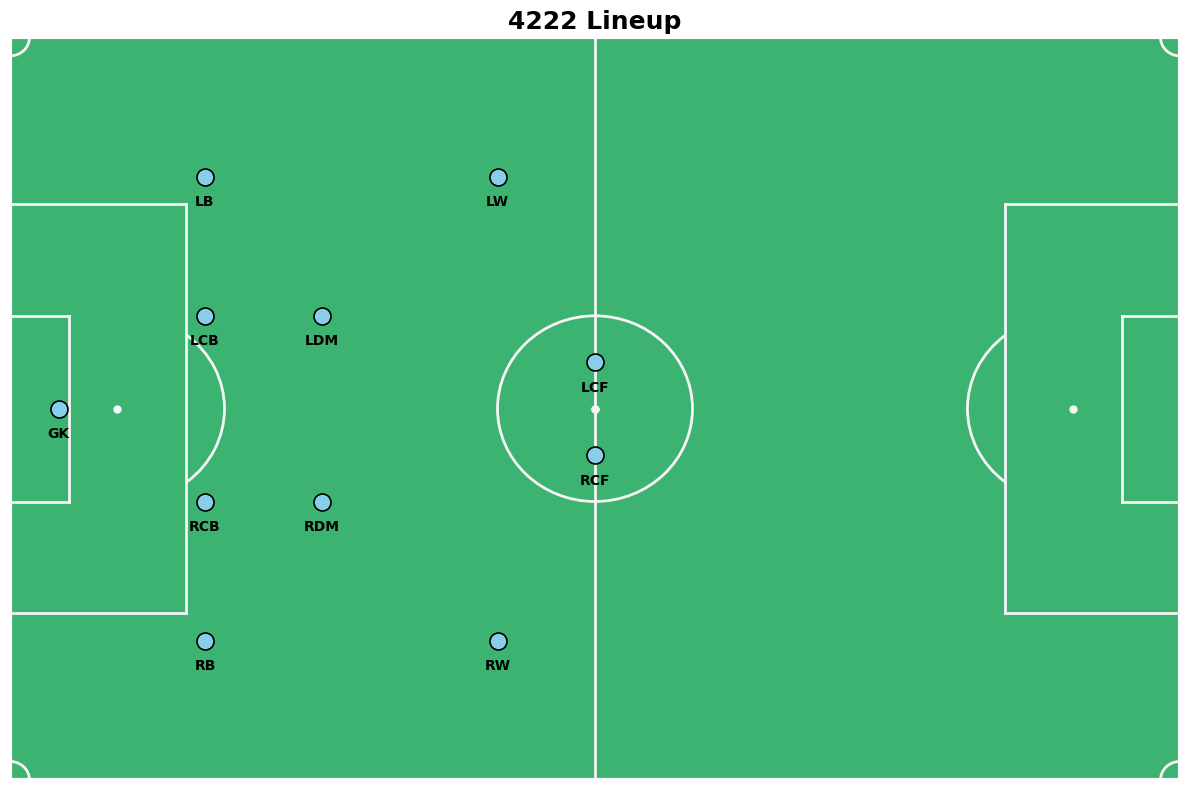

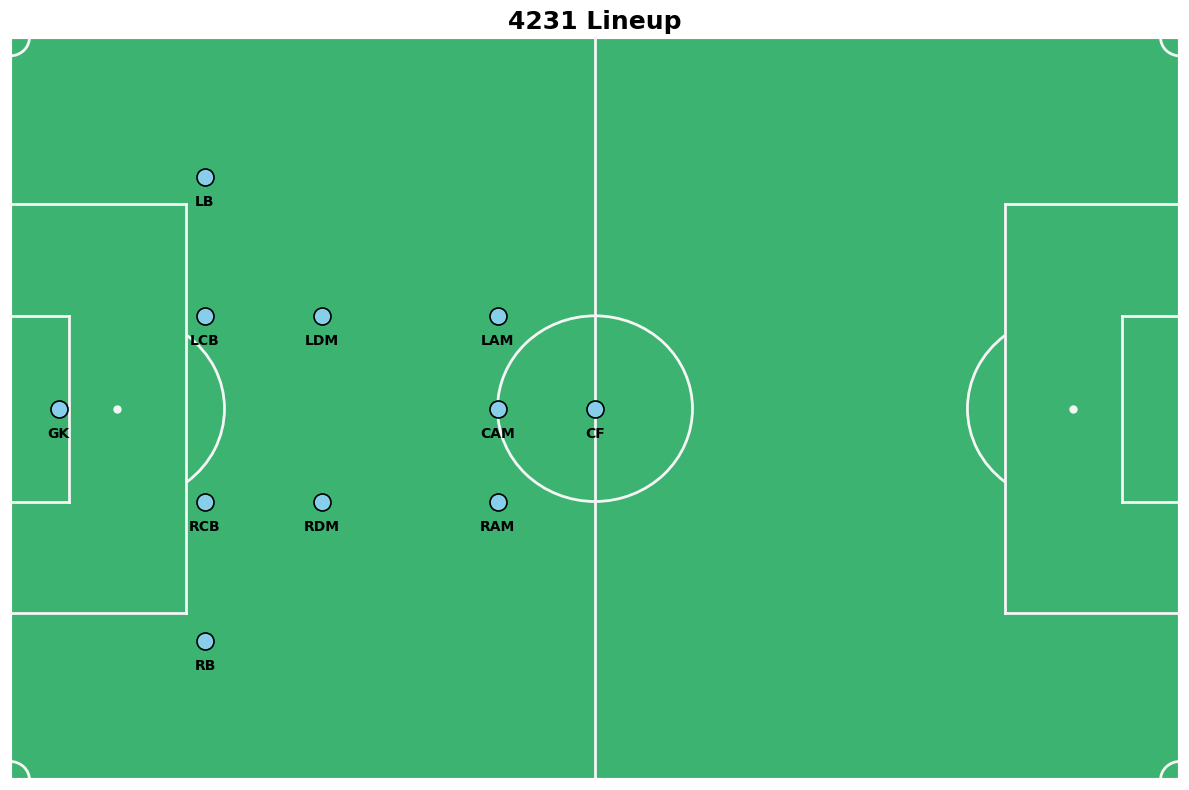

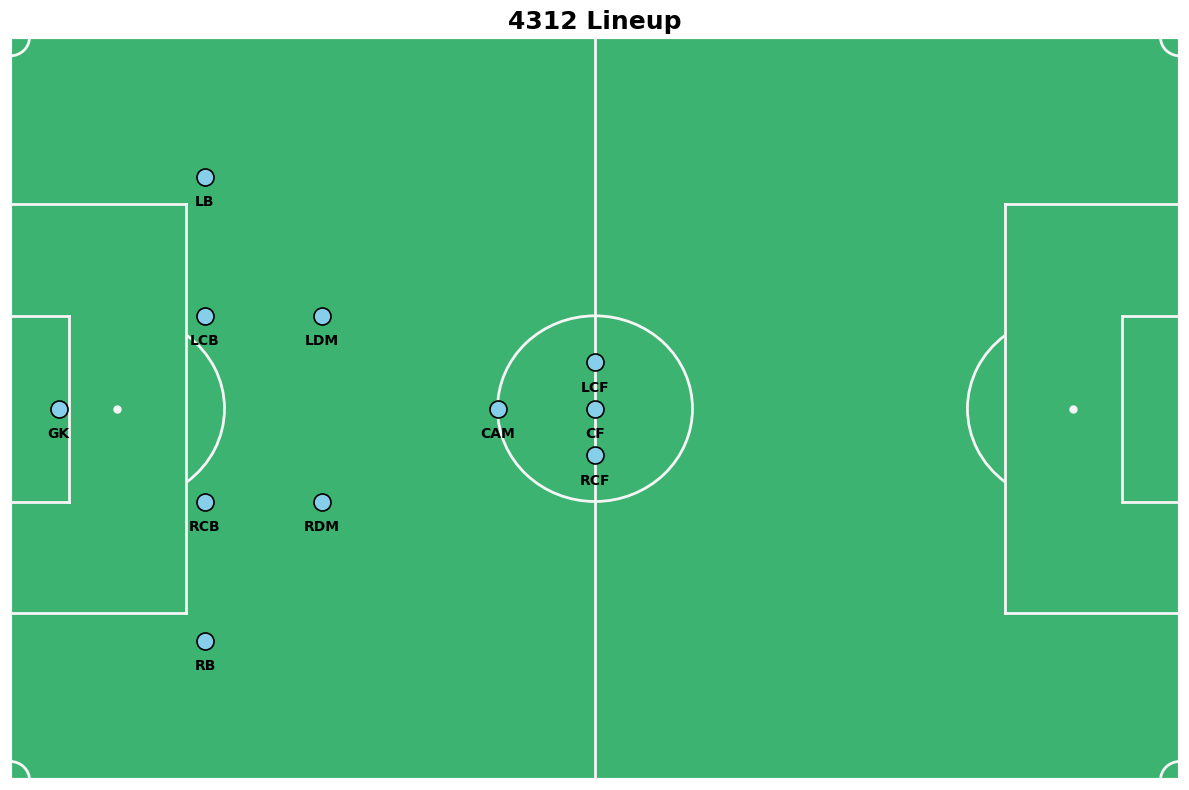

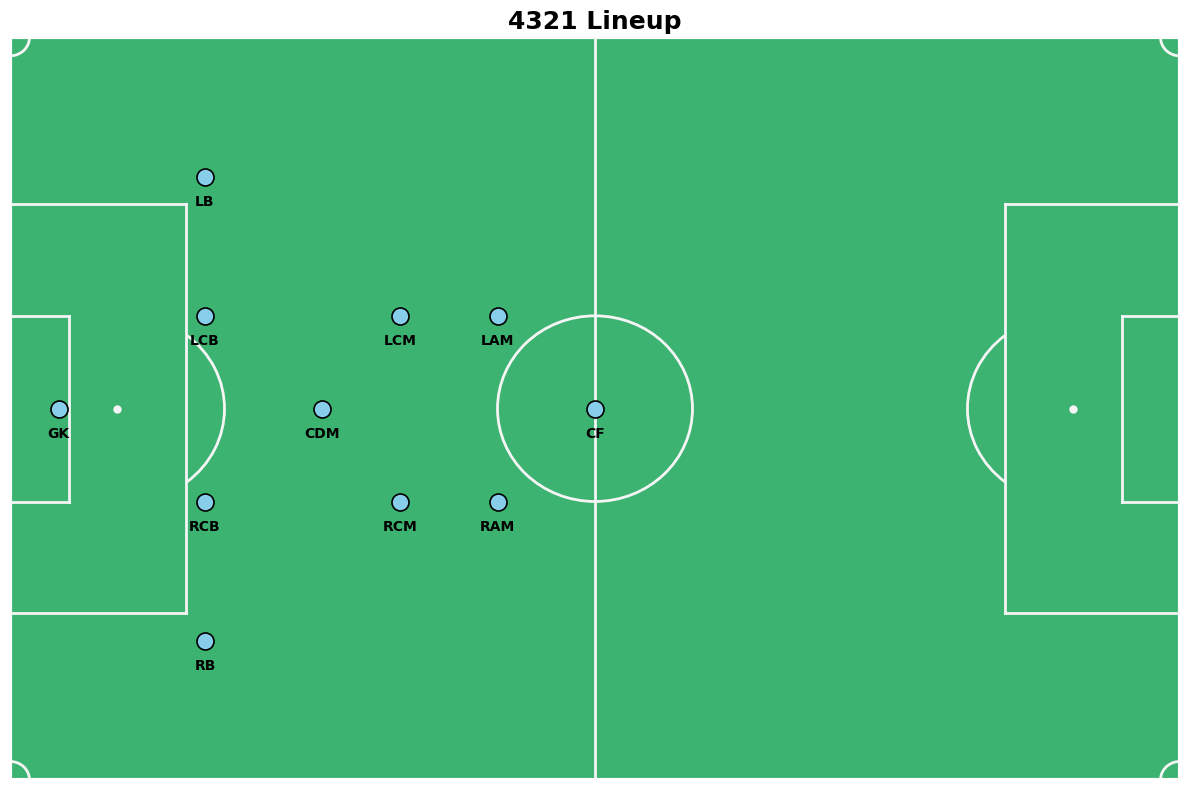

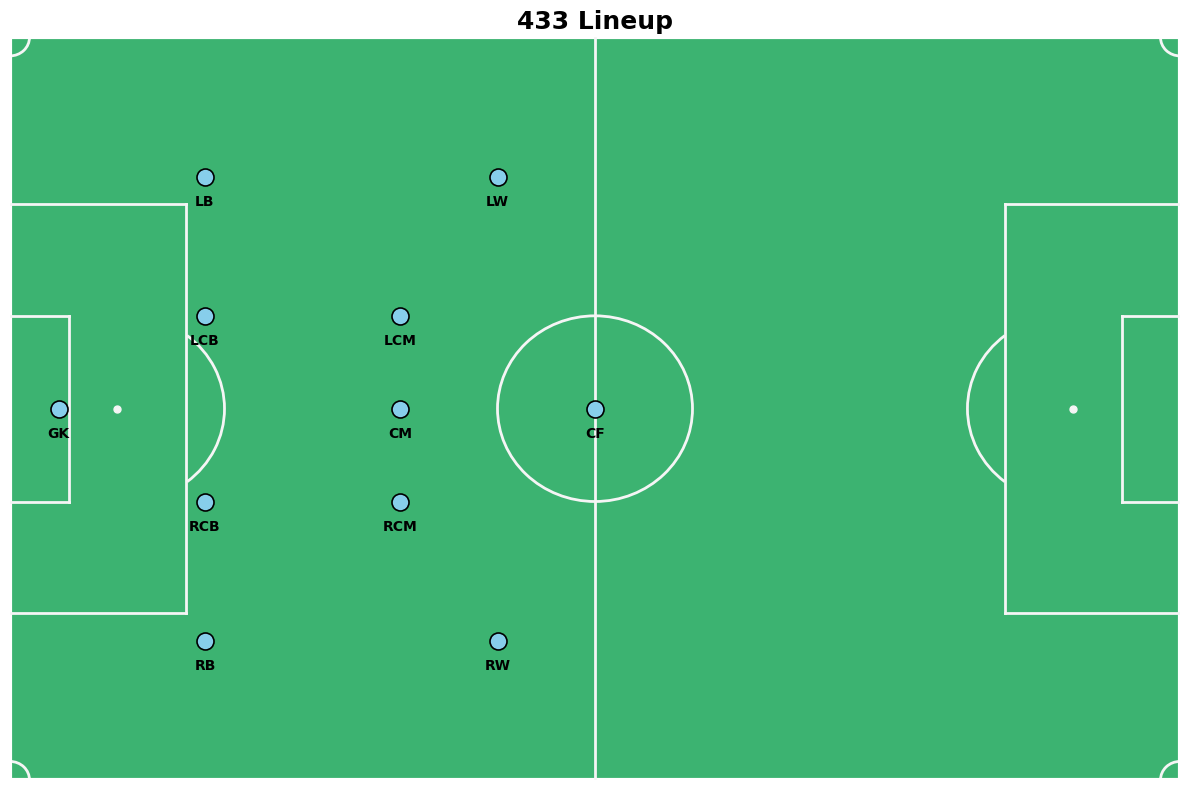

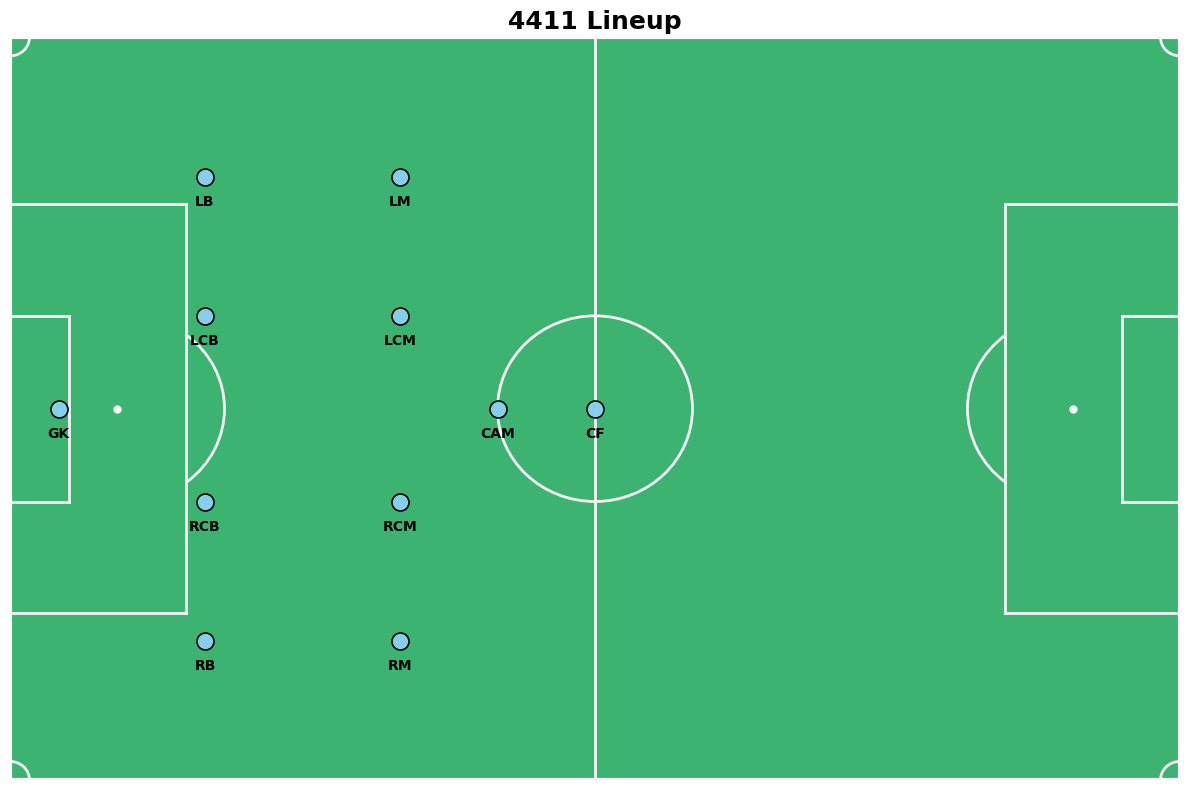

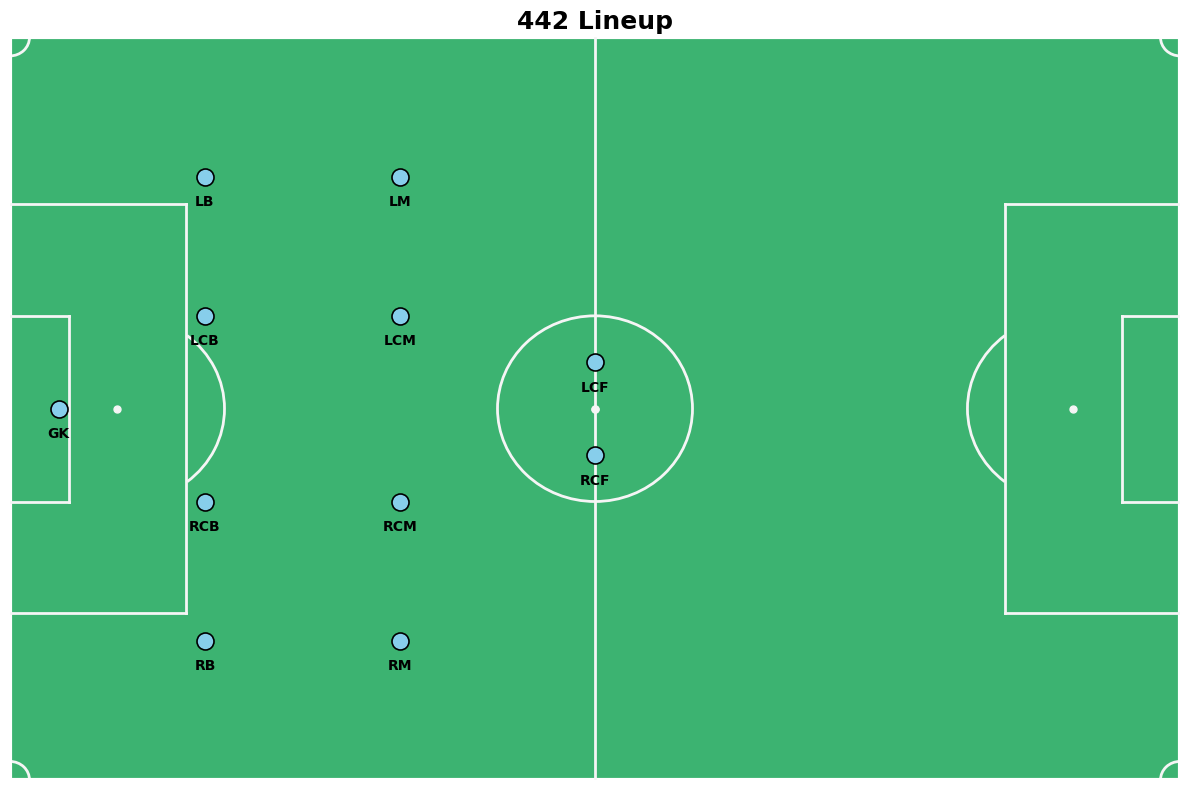

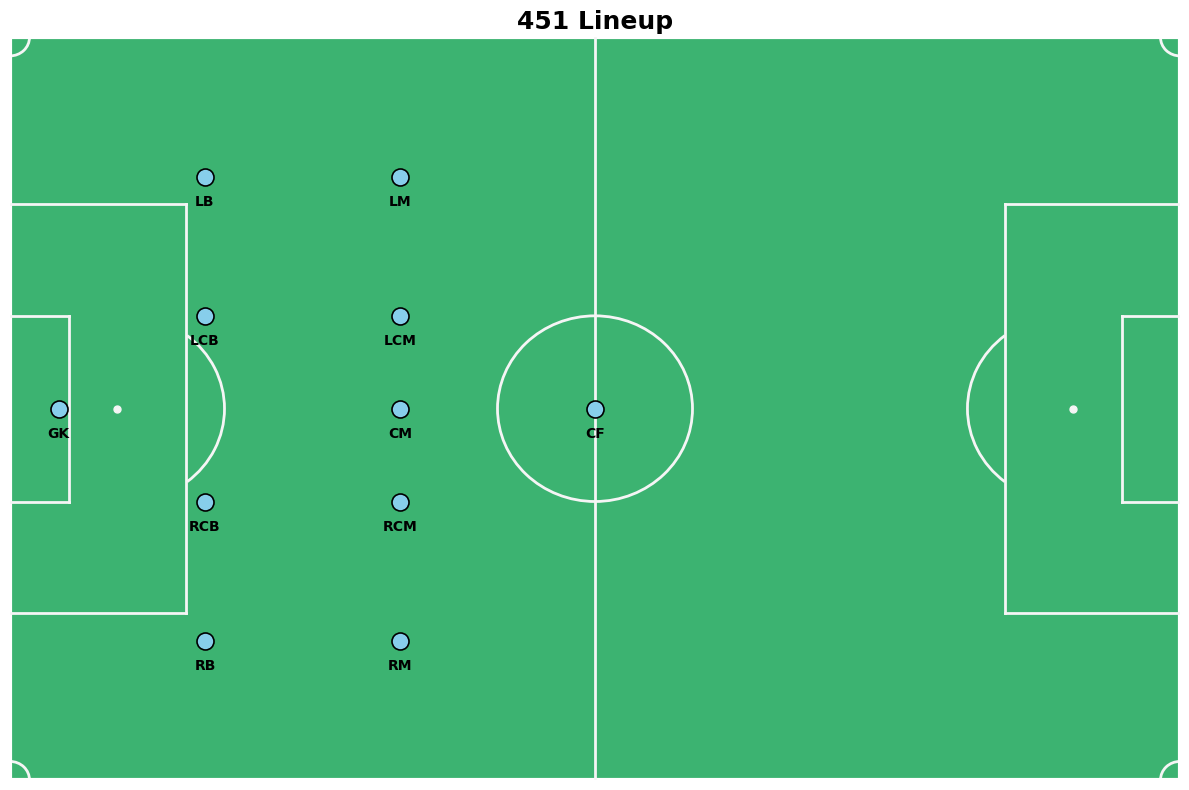

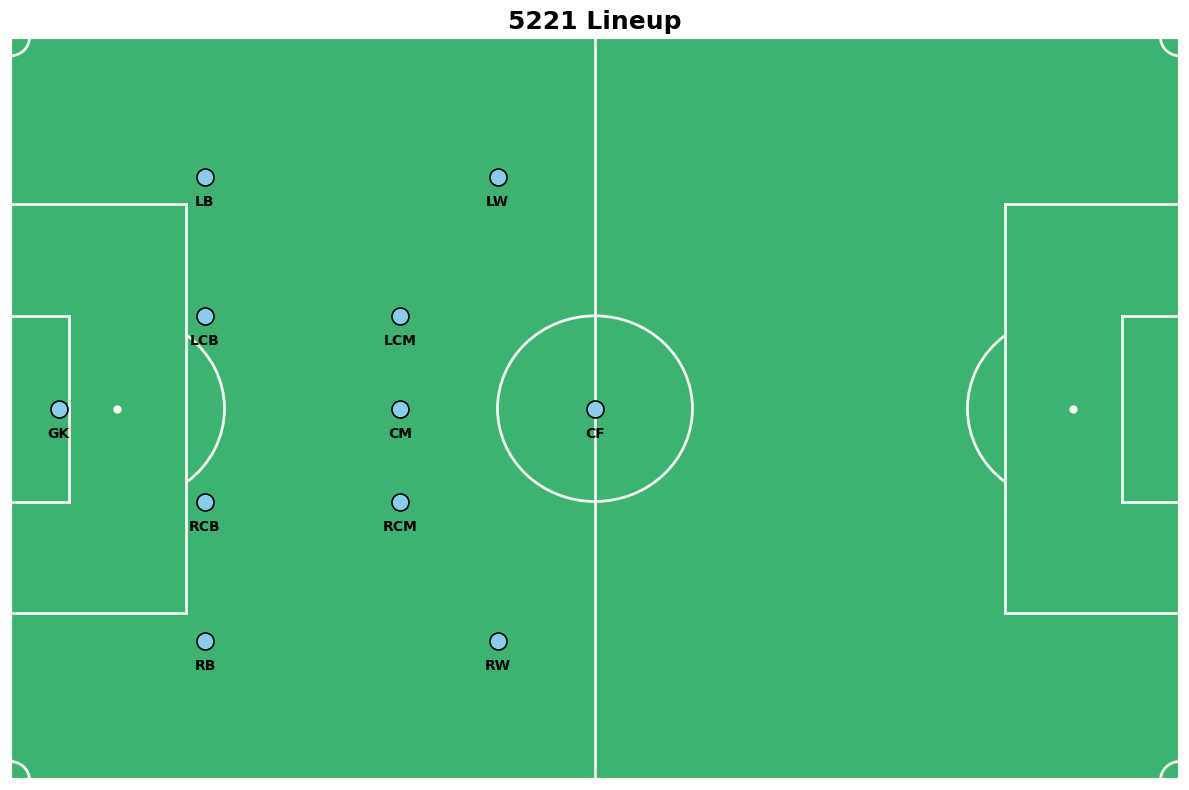

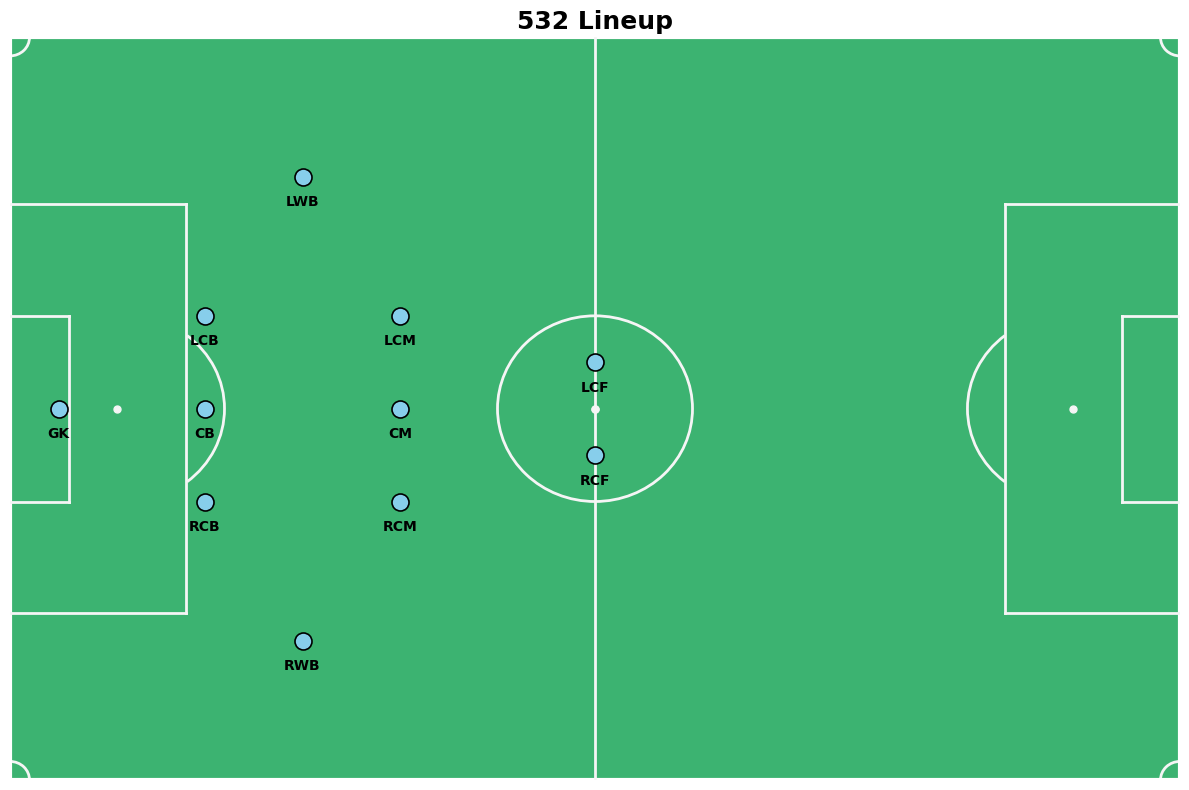

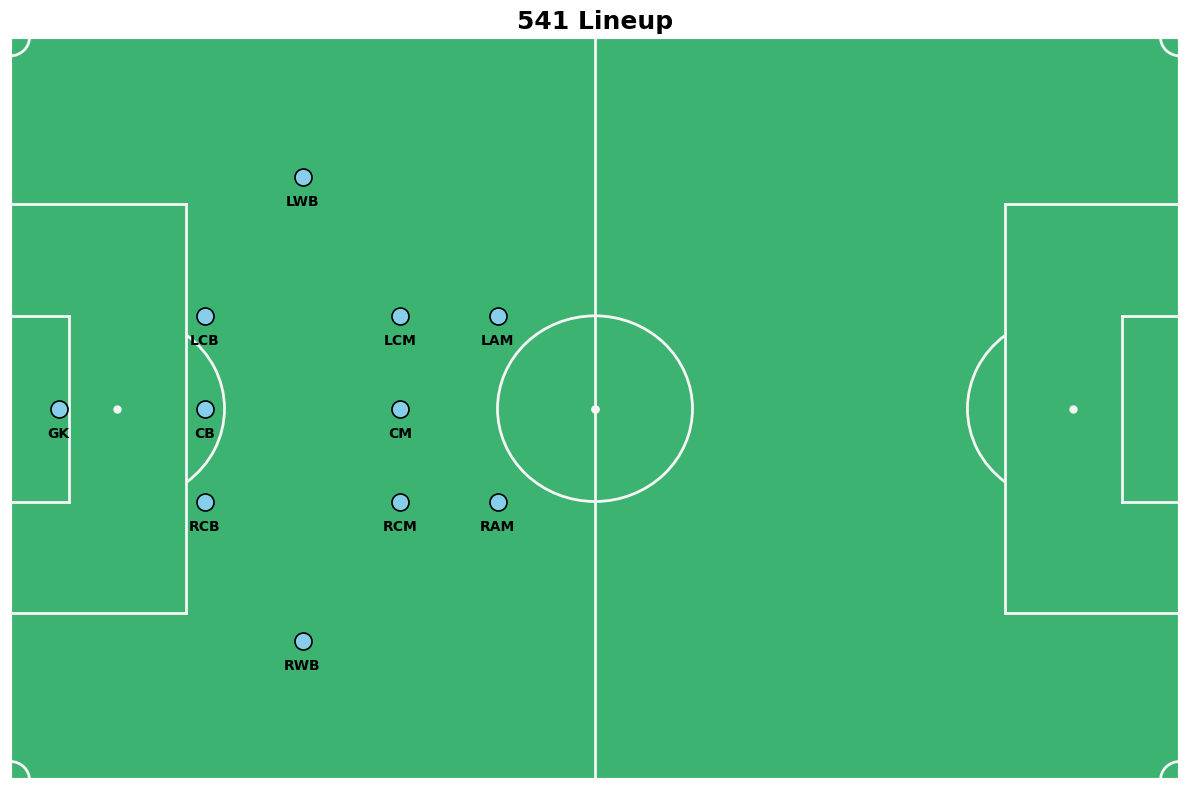

In [23]:
# Loop through all formations in the dictionary
for formation_code, lineup in formations.items():
    fig, ax = plt.subplots(figsize=(12, 8))
    draw_pitch(ax)

    # Plot each player
    for player in lineup:
        x, y = player["x"], player["y"]
        abbr = player["abbr"]
        ax.scatter(x, y, s=150, color="skyblue", edgecolor="black", linewidth=1.2, zorder=3)
        ax.text(x, y + 3.5, abbr, fontsize=10, ha="center", va="bottom", color="black", fontweight="bold")

    plt.title(f"{formation_code} Lineup", fontsize=18, fontweight="bold")
    plt.tight_layout()
    plt.show()
    
    time.sleep(1)